# MNIST Data Analysis and Classification

### Columns
- **Response - Labels**: The digit represented by the image (0-9).
- **Feature I - Intensity**: The pixel intensity.
- **Feature II - Symmetry**: The pixel symmetry.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from pandas.conftest import axis_1

import linear_models as models
import data_util as utils

In [37]:
# info = pd.read_csv('data/MNIST_info.txt')
train_data = np.loadtxt('data/MNIST_train.txt')
test_data = np.loadtxt('data/MNIST_test.txt')

# Label extraction
train_labels = train_data[:, 0].astype(int)
test_labels = test_data[:, 0].astype(int)

In [38]:
train_data

array([[ 6.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [ 5.   , -1.   , -1.   , ..., -0.671, -0.828, -1.   ],
       [ 4.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       ...,
       [ 3.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [ 0.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [ 1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ]])

In [39]:
print(f'Training data labels: {train_labels}\nTesting data labels: {test_labels}')

Training data labels: [6 5 4 ... 3 0 1]
Testing data labels: [9 6 3 ... 4 0 1]


In [40]:
train_pixels = train_data[:, 1:]
test_pixels = test_data[:, 1:]

In [41]:
print(f'Training pixels: {train_pixels}\nTesting pixels: {test_pixels}')

Training pixels: [[-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ... -0.671 -0.828 -1.   ]
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 ...
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]]
Testing pixels: [[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


In [42]:
train_intensities = np.mean(train_pixels, axis=1)
test_intensities = np.mean(test_pixels, axis=1)

In [43]:
print(f'Pixel data intensities: {train_intensities}\n\nPixel Testing data intensities: {test_intensities}')

Pixel data intensities: [-0.31781641 -0.11173828 -0.53799609 ... -0.21258984  0.19517969
 -0.44755859]

Pixel Testing data intensities: [-0.45564453 -0.46973437 -0.32814844 ... -0.38228516  0.01994141
 -0.62204687]


In [33]:
def calculate_symmetry(pixels):
    """
    Calculate the symmetry of the pixel data.
    """
    # Reshape the pixel data to 16x16
    pixels = pixels.reshape(-1, 16, 16)

    # Calculate absolute difference between left and right halves (flipped)
    left_half = pixels[:, :, :8]
    right_half = pixels[:, :, 8:16]
    right_half_flipped = np.flip(right_half, axis=2)

    # Symmetry calculation with mean absolute error
    symmetry = 1 - np.mean(np.abs(left_half - right_half_flipped), axis=(1, 2))
    
    return symmetry

In [34]:
train_symmetry = calculate_symmetry(train_pixels)
test_symmetry = calculate_symmetry(test_pixels)

In [35]:
train_df = pd.DataFrame({
    'Label': train_labels,
    'Intensity': train_intensities,
    'Symmetry': train_symmetry
})

test_df = pd.DataFrame({
    'Label': test_labels,
    'Intensity': test_intensities,
    'Symmetry': test_symmetry
})

In [36]:
train_df.head(10)

,Label,Intensity,Symmetry
0,6.0,-0.317816,0.620789
1,5.0,-0.111738,0.466273
2,4.0,-0.537996,0.556992
3,7.0,-0.599449,0.702945
4,3.0,-0.416129,0.651055
5,6.0,-0.574430,0.493344
6,3.0,-0.593242,0.508094
7,1.0,-0.753914,0.882563
8,0.0,-0.420918,0.562133
9,1.0,-0.772281,0.837703


In [44]:
test_df.head(10)

,Label,Intensity,Symmetry
0,9.0,-0.455645,0.480117
1,6.0,-0.469734,0.452781
2,3.0,-0.328148,0.493016
3,6.0,-0.470301,0.522570
4,6.0,-0.309324,0.309367
5,0.0,-0.295230,0.668836
6,0.0,-0.344187,0.708172
7,0.0,-0.299211,0.811203
8,6.0,-0.354484,0.467203
9,9.0,-0.621277,0.721664


In [47]:
train_counts = train_df['Label'].value_counts()
test_counts = test_df['Label'].value_counts()

print(f'Training data counts: {train_counts}\nTesting data counts: {test_counts}')

Training data counts: Label
0.0    1194
1.0    1005
2.0     731
6.0     664
3.0     658
4.0     652
7.0     645
9.0     644
5.0     556
8.0     542
Name: count, dtype: int64
Testing data counts: Label
0.0    359
1.0    264
4.0    200
2.0    198
9.0    177
6.0    170
3.0    166
8.0    166
5.0    160
7.0    147
Name: count, dtype: int64


In [51]:
# For checking the distribution of labels in the training and testing data
# This was more of a sanity check to ensure the data was loaded correctly
# And also because the series was not in order

train_counts = np.bincount(train_labels)
test_counts = np.bincount(test_labels)

# print(f'Training data counts: {train_counts}\nTesting data counts: {test_counts}')

# Problem 1

## (A) Plotting for the distribution of labels in the training and testing data

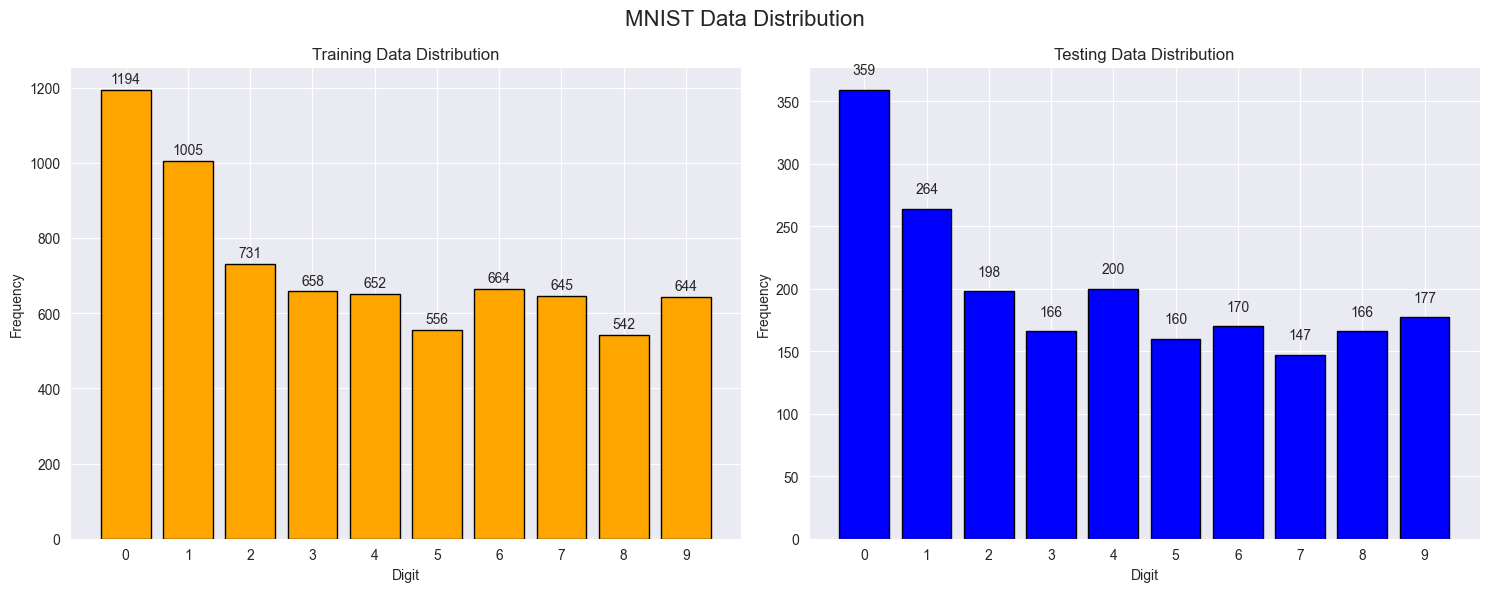

In [52]:
# Plotting for the distribution of labels in the training and testing data
fig, (axis_1, axis_2) = plt.subplots(1, 2, figsize=(15, 6))

digits = np.arange(10)
axis_1.bar(digits, train_counts, color='orange', edgecolor='black')
axis_1.set_xticks(digits)
axis_1.set_xlabel('Digit')
axis_1.set_ylabel('Frequency')
axis_1.set_title('Training Data Distribution')

for i, count in enumerate(train_counts):
    axis_1.text(i, count + 10, str(count), ha='center', va='bottom')
    
axis_2.bar(digits, test_counts, color='blue', edgecolor='black')
axis_2.set_xticks(digits)
axis_2.set_xlabel('Digit')
axis_2.set_ylabel('Frequency')
axis_2.set_title('Testing Data Distribution')

for i, count in enumerate(test_counts):
    axis_2.text(i, count + 10, str(count), ha='center', va='bottom')
    
plt.suptitle('MNIST Data Distribution', fontsize=16)
    
plt.tight_layout()
plt.show()

## (B) Plotting the pixel intensity and symmetry for each digit

Text(0, 0.5, 'Frequency')

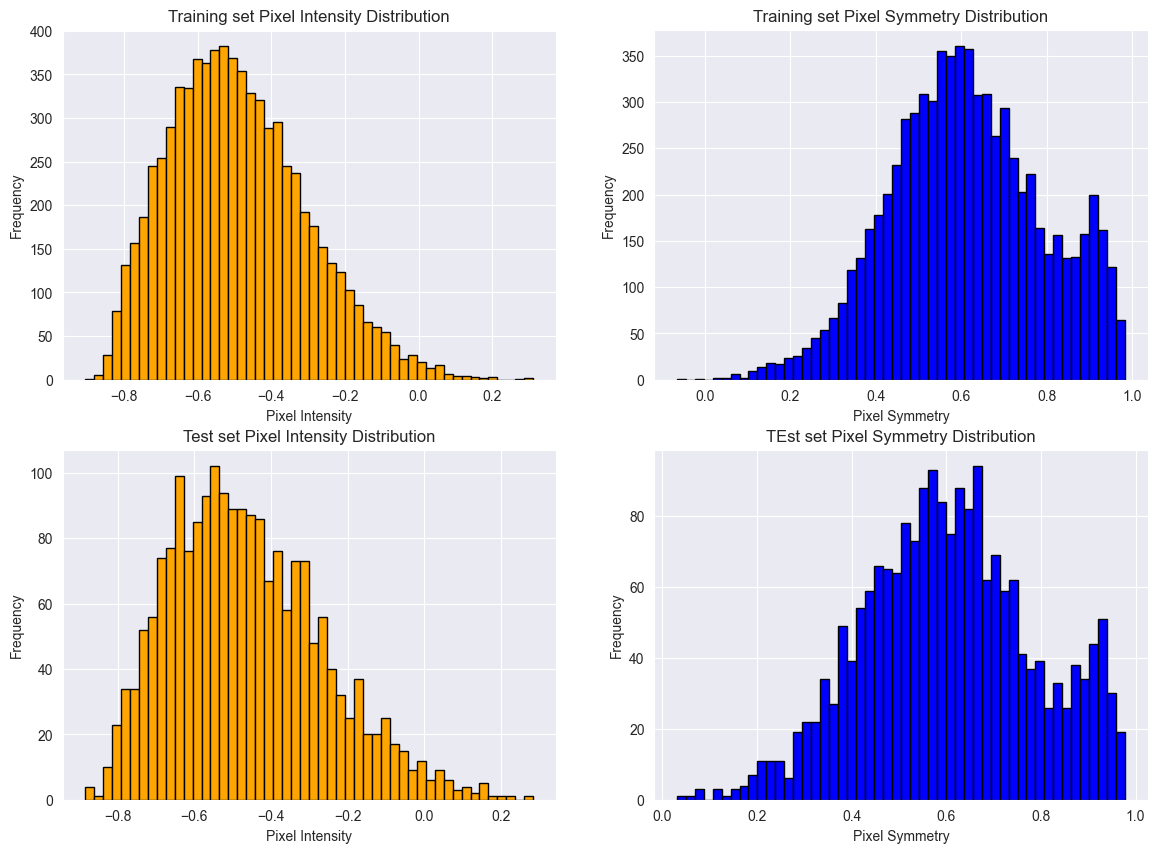

In [60]:
# Train (Symmetry & Intensity) Plots

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(train_intensities, bins=50, color='orange', edgecolor='black')
axes[0, 0].set_title('Training set Pixel Intensity Distribution')
axes[0, 0].set_xlabel('Pixel Intensity')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(train_symmetry, bins=50, color='blue', edgecolor='black')
axes[0, 1].set_title('Training set Pixel Symmetry Distribution')
axes[0, 1].set_xlabel('Pixel Symmetry')
axes[0, 1].set_ylabel('Frequency')

# Test (Symmetry & Intensity) Plots

axes[1, 0].hist(test_intensities, bins=50, color='orange', edgecolor='black')
axes[1, 0].set_title('Test set Pixel Intensity Distribution')
axes[1, 0].set_xlabel('Pixel Intensity')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(test_symmetry, bins=50, color='blue', edgecolor='black')
axes[1, 1].set_title('TEst set Pixel Symmetry Distribution')
axes[1, 1].set_xlabel('Pixel Symmetry')
axes[1, 1].set_ylabel('Frequency')

In [61]:
# Print summary statistics
print("===== Summary Statistics =====")
print("\nTraining Set:")
print(f"Intensity - Mean: {np.mean(train_intensities):.4f}, Median: {np.median(train_intensities):.4f}, Std: {np.std(train_intensities):.4f}")
print(f"Symmetry - Mean: {np.mean(train_symmetry):.4f}, Median: {np.median(train_symmetry):.4f}, Std: {np.std(train_symmetry):.4f}")

print("\nTest Set:")
print(f"Intensity - Mean: {np.mean(test_intensities):.4f}, Median: {np.median(test_intensities):.4f}, Std: {np.std(test_intensities):.4f}")
print(f"Symmetry - Mean: {np.mean(test_symmetry):.4f}, Median: {np.median(test_symmetry):.4f}, Std: {np.std(test_symmetry):.4f}")


===== Summary Statistics =====

Training Set:
Intensity - Mean: -0.4910, Median: -0.5094, Std: 0.1859
Symmetry - Mean: 0.6116, Median: 0.6045, Std: 0.1791

Test Set:
Intensity - Mean: -0.4648, Median: -0.4877, Std: 0.1990
Symmetry - Mean: 0.6055, Median: 0.5999, Std: 0.1799


In [62]:
train_data_binaries = train_labels.copy()
test_data_binaries = test_labels.copy()

print(f'Training data labels: {train_data_binaries}\nTesting data labels: {test_data_binaries}')

Training data labels: [6 5 4 ... 3 0 1]
Testing data labels: [9 6 3 ... 4 0 1]


In [64]:
train_data_binaries = np.where(train_data_binaries == 1, 1, -1)
test_data_binaries = np.where(test_data_binaries == 1, 1, -1)

print(f'Training data labels: {train_data_binaries}\nTesting data labels: {test_data_binaries}')

Training data labels: [-1 -1 -1 ... -1 -1  1]
Testing data labels: [-1 -1 -1 ... -1 -1  1]
